# 프로젝트 주제
 -  Airbnb(New York City) 리스트로 가격을 함께 예측해보겠습니다.

# 머신러닝 프로젝트
- Airbnb(New York City)
 - 미국 NYC Airbnb 목록(2019)
 - 데이터 출처 : https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data   / License CC0: Public Domain
 - 프로젝트 목적 : 가격 예측 (price)
 - 제공데이터(3개) : train.csv, test.csv, y_test(최종 채점용)
 - 평가 방식: MSE


In [32]:
# 라이브러리
import pandas as pd
import numpy as np

In [34]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y_test = pd.read_csv('y_test.csv')

# EDA

In [35]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [36]:
# 데이터 샘플  # display 로 쓰면 더 이쁘게 표로 확인 가능
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [37]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [38]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [39]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

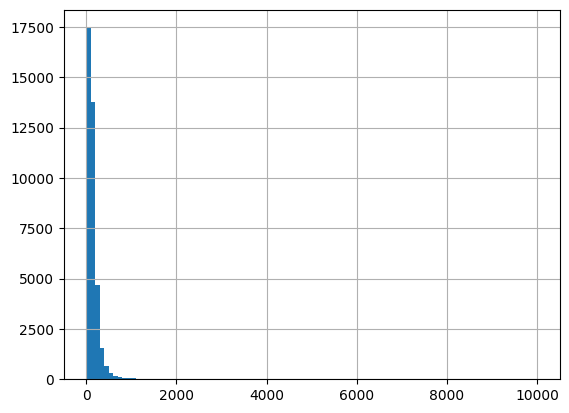

In [40]:
# target(hist)
train['price'].hist(bins=100)

<Axes: >

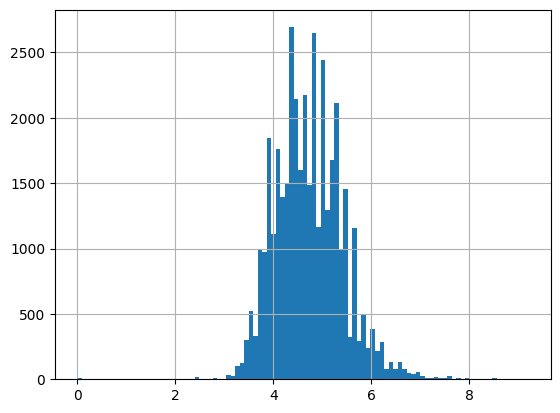

In [41]:
train['price'] = np.log(train.price+1)
train['price'].hist(bins=100)

In [42]:
# target(describe)
train['price'].describe()

count    39116.000000
mean         4.737628
std          0.694731
min          0.000000
25%          4.248495
50%          4.663439
75%          5.170484
max          9.210440
Name: price, dtype: float64

In [43]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

# 데이터 전처리

In [44]:
# 결측치 컬럼 삭제(last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [45]:
# 결측치 채우기
train['reviews_per_month']=train['reviews_per_month'].fillna(0)
test['reviews_per_month']=test['reviews_per_month'].fillna(0)

In [46]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [47]:
# 가격 값 복사
target = train['price']
train = train.drop('price',axis=1)

In [48]:
# 수치형 피처 선택
cols = [
    'host_id',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
    ]
train = train[cols]
test = test[cols]

#  검증 데이터 분리

In [49]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

머신러닝

In [50]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression(copy_X= True, fit_intercept = True)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

0.40132904538499276

In [51]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge(alpha = 0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.01777e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.4013296968563009

In [52]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('y_test.csv')
y_test['price'] = np.log(y_test.price + 1)


In [53]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model = Lasso(alpha = 0.001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

0.40228620728740494

In [54]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha = 0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

0.4447324991412844

In [55]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

0.2849645111988999

In [56]:
# Xgboost
from xgboost import XGBRegressor

model = XGBRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

0.2929776924608125

# 채점

In [57]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('y_test.csv')
y_test['price'] = np.log(y_test.price + 1)

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test, pred)

0.2965982620432134

#과제 내용

In [58]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요!
print("나의 점수는 (MSE 0.4610389295083336)입니다.")

나의 점수는 (MSE 0.4610389295083336)입니다.


# 성능향상 Tip

In [59]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

# test 데이터 예측 및 평가
y_test = pd.read_csv('y_test.csv')

> 캐글에 서 보고 배운것 정리

In [60]:
# 사용할 라이브러리

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [61]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<Axes: >

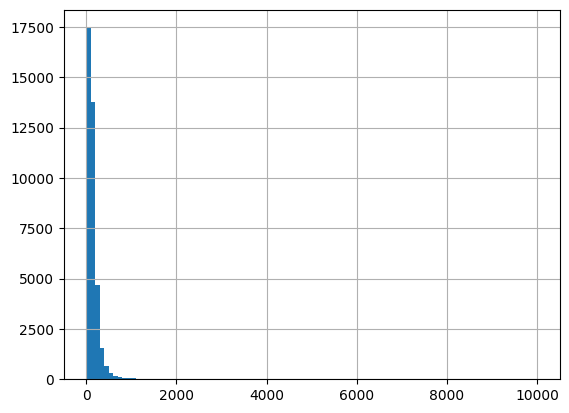

In [62]:
train['price'].hist(bins=100)

In [63]:
train['price_log'] = np.log(train.price+1)

<ipython-input-64-ca555610aa00>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price_log'], fit=norm)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

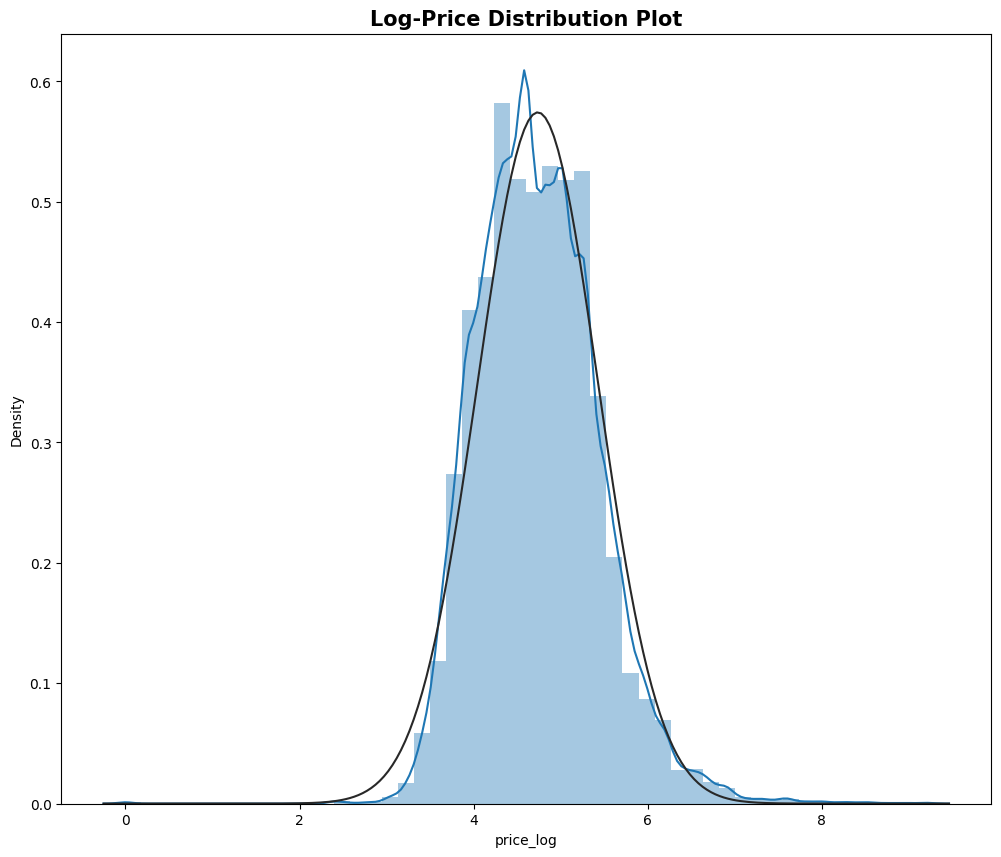

In [64]:
plt.figure(figsize=(12,10))
sns.distplot(train['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

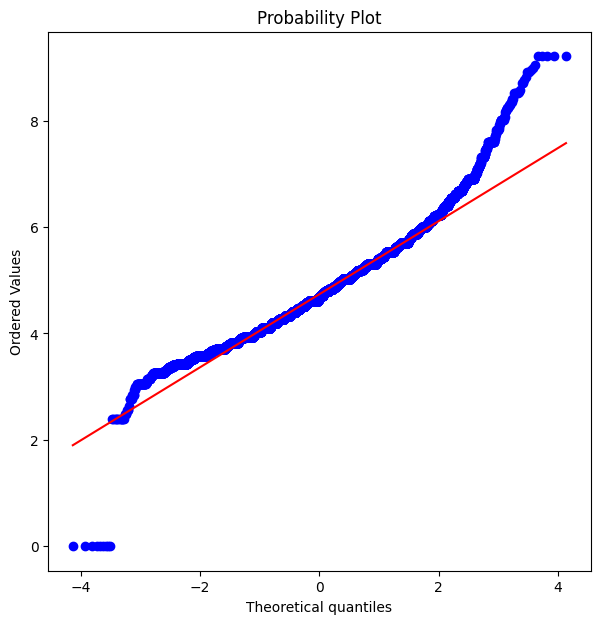

In [65]:
plt.figure(figsize=(7,7))
stats.probplot(train['price_log'], plot=plt)
plt.show()

In [66]:
model = train.drop(columns=['name','id' ,'host_id','host_name',
                                   'last_review','price'])
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
price_log                            0
dtype: int64

In [67]:
mean = model['reviews_per_month'].mean()
model['reviews_per_month'].fillna(mean, inplace=True)
model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

<ipython-input-68-d0ebc4a4835f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=model.corr(method='pearson')


Text(0.5, 1.0, 'Correlation Matrix')

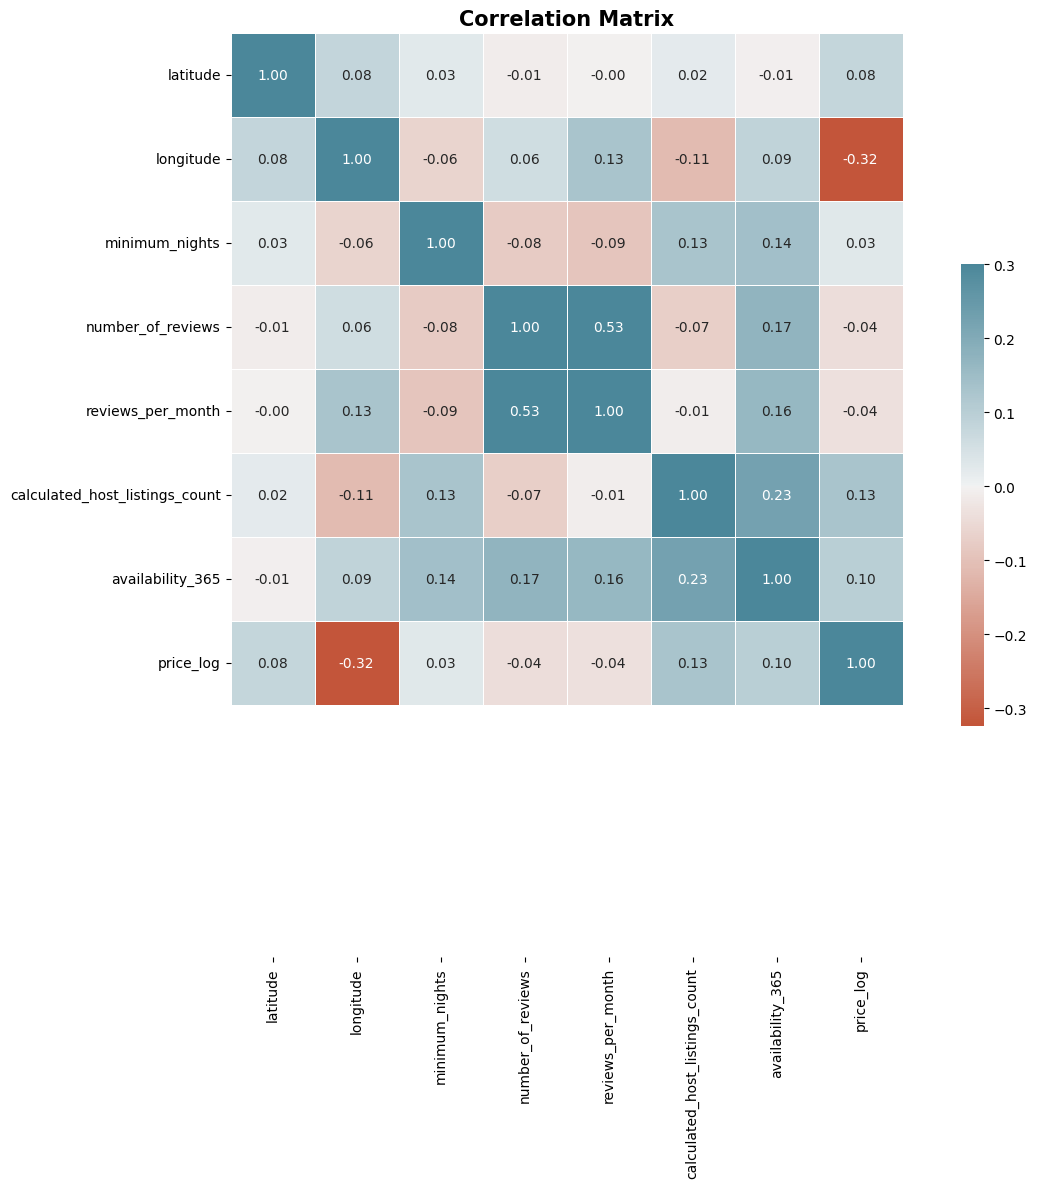

In [68]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [69]:
### Ridge Regression ###

def ridge_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Ridge= Ridge()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(input_x, input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_
    best_score_Ridge = grid_search_Ridge.best_score_
    print(best_parameters_Ridge)
    print(best_score_Ridge)

# ridge_reg(nyc_model_x, nyc_model_y)

In [70]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_
    best_score_lasso = grid_search_lasso.best_score_
    print(best_parameters_lasso)
    print(best_score_lasso)

# lasso_reg(nyc_model_x, nyc_model_y)

In [71]:
### ElasticNet Regression ###

def elastic_reg(input_x, input_y,cv=5):
    ## Defining parameters
    model_grid_Elastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_elastic.fit(input_x, input_y)
    best_parameters_elastic = grid_search_elastic.best_params_
    best_score_elastic = grid_search_elastic.best_score_
    print(best_parameters_elastic)
    print(best_score_elastic)

# elastic_reg(nyc_model_x, nyc_model_y)

In [73]:
#Ridge Model
model1 = Ridge(alpha = 0.01, normalize = True)
model1.fit(X_train, y_train)
pred1 = model.predict(X_test)

#Lasso Model
model2 = Lasso(alpha = 0.001, normalize =False)
model2.fit(X_train, y_train)
pred2 = model.predict(X_test)

#ElasticNet Model
model3 = ElasticNet(alpha = 0.01, normalize=False)
model3.fit(X_train, y_train)
pred3= model_enet.predict(X_test)

TypeError: ignored

> # 부록 1 : 이미지 데이터 만들고 분류하기

In [74]:
# 라이브러리
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pylab as plt

In [76]:
# 압축 해제
import shutil
shutil.unpack_archive("data.zip", "")

In [77]:
# 경로
train_path = "train/"
valid_path = "validation/"
print(train_path)
print(valid_path)

train/
validation/


In [78]:
 #이미지 데이터 제너레이터
image_gen = ImageDataGenerator(rescale=(1/255.))
image_gen


In [79]:
# flow_from_directory 함수로 폴더에서 이미지 가져옴
train_gen = image_gen.flow_from_directory(train_path,
                                          batch_size=32,
                                          target_size=(96,96),
                                          classes=['good','bad'],
                                          class_mode = 'binary',
                                          seed=0)
valid_gen = image_gen.flow_from_directory(valid_path,
                                          batch_size=32,
                                          target_size=(96,96),
                                          classes=['good','bad'],
                                          class_mode = 'binary',
                                          seed=0)

Found 695 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


In [80]:
# 이미지 데이터 제너레이터
# [[YOUR CODE]]
image_gen = ImageDataGenerator(rescale=(1/255.))
image_gen

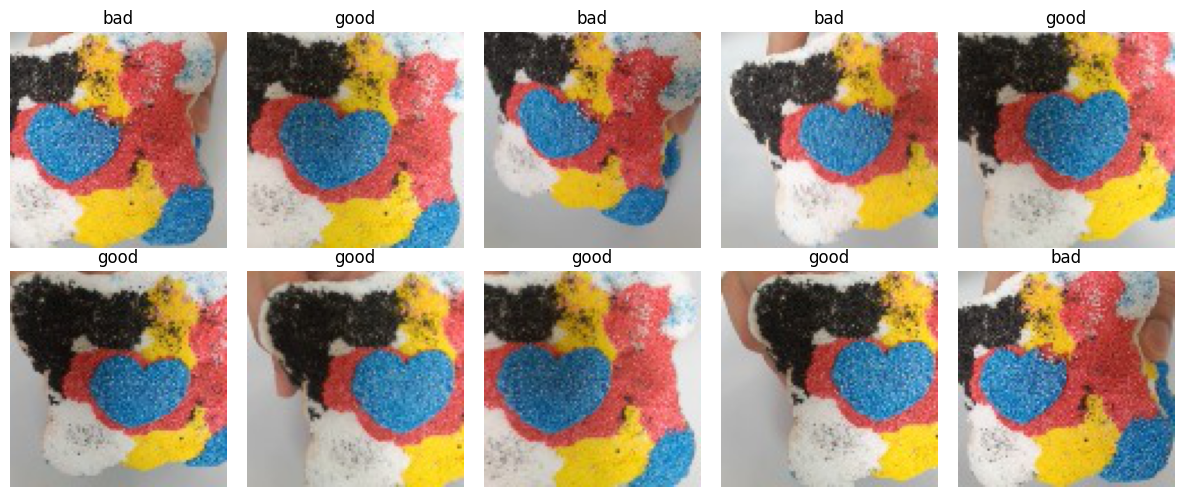

In [81]:
# 샘플 이미지 출력
class_labels = ['good','bad']
batch = next(train_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize=(12, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(int)])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [82]:
# 모델
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential([
    tf.keras.layers.BatchNormalization(),
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [83]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [84]:
# 모델 훈련
history = model.fit(train_gen, validation_data=valid_gen,epochs=3)

Epoch 1/3
22/22 [==============================] - 5s 55ms/step - loss: 0.7063 - accuracy: 0.8863 - val_loss: 1.4705 - val_accuracy: 0.6230
Epoch 2/3
22/22 [==============================] - 1s 28ms/step - loss: 0.0031 - accuracy: 0.9986 - val_loss: 0.3309 - val_accuracy: 0.8279
Epoch 3/3
22/22 [==============================] - 1s 29ms/step - loss: 0.0023 - accuracy: 0.9986 - val_loss: 0.1185 - val_accuracy: 0.9262


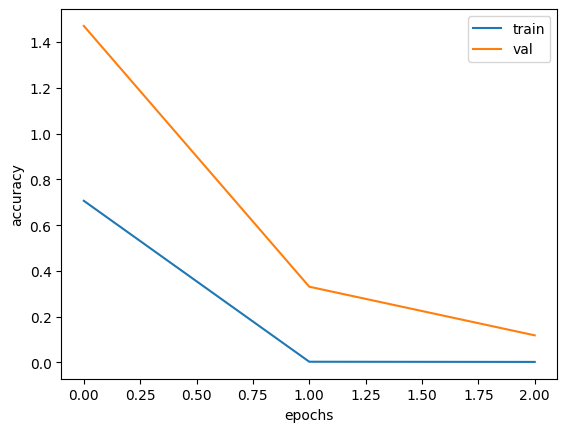

In [85]:
# 학습 정확도
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

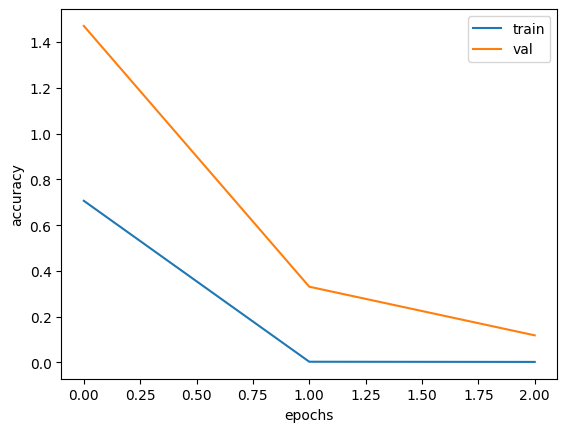

In [86]:
# loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()